In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt 

In [2]:
def potential_well(a, U):

    def transcendental_equation(k):
        return np.tan(k*a) + (np.sqrt(k**2 - U))/k
    
    roots = opt.fsolve(transcendental_equation, x0= np.linspace(0,np.sqrt(U),100))

    eigen_values = roots ** 2

    return eigen_values


In [3]:
def normalize_wavefunction(psi, x):

    n_factor = np.sqrt(np.trapz(np.abs(psi**2), x))

    return psi/n_factor

In [69]:
def plot_wavefunction(U, a, energies):

    x = np.linspace(-2*a , 2*a , 1000)
    alpha_arr = []
    eigen_arr = []
    k_arr = []

    for eigen_value in energies:
        # print(f'Eigen Value: {eigen_value}')
        eigen_arr.append(eigen_value)
        k = np.sqrt(eigen_value)
        k_arr.append(k)
        # print(f'k:{k}')
        alpha = np.sqrt(U - eigen_value)
        # print(f'Alpha:{alpha}')
        alpha_arr.append(alpha)

        psi_inside = np.cos(k * x)
        psi_outside_left = np.exp(- alpha * (x + a))
        psi_outside_right = np.exp(- alpha * (x - a))
        const_func = 1

        psi = np.piecewise(x, [x < -a, -a <= x, x > a], funclist = [lambda x: np.exp(alpha * (x + a)) \
                                                                        ,lambda x: np.cos(k * x) \
                                                                        ,lambda x: np.exp(- alpha * (x - a))])
        

        normalize_psi = normalize_wavefunction(psi, x)

        plt.plot(x, normalize_psi)


    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title(f"Finite potential well U = {U}, a = {a}")
    plt.legend()
    plt.show()

    print(alpha_arr)
    print(eigen_arr)
    print(k_arr)

C:\Users\ratho\AppData\Local\Temp\ipykernel_27000\3974957855.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(k*a) + (np.sqrt(k**2 - U))/k
C:\Users\ratho\AppData\Local\Temp\ipykernel_27000\3974957855.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  roots = opt.fsolve(transcendental_equation, x0= np.linspace(0,np.sqrt(U),100))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


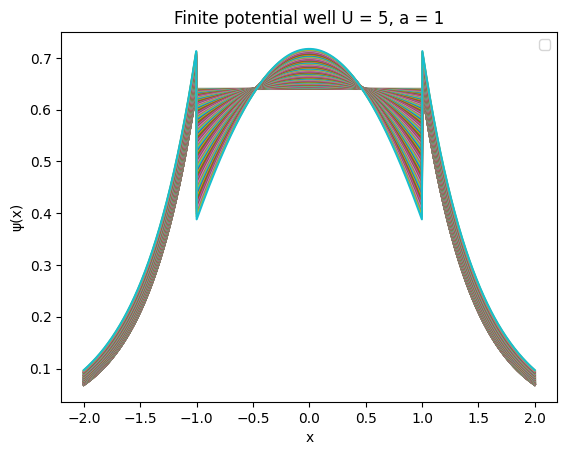

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.23606797749979, 2.23604516269125, 2.2359767168688847, 2.235862635842026, 2.235702912624803, 2.235497537434001, 2.235246497686064, 2.2349497779932386, 2.234607360158852, 2.2342192231717286, 2.2337853431997283, 2.23330569358242, 2.232780244822866, 2.2322089645785272, 2.2315918176512706, 2.2309287659764805, 2.2302197686112595, 2.2294647817217155, 2.2286637585693208, 2.227816649496337, 2.2269234019102937, 2.22598396026751, 2.2249982660556427, 2.223966257775258, 2.2228878709204007, 2.2217630379581568, 2.2205916883071866, 2.2193737483152187, 2.218109141235481, 2.216797787202059, 2.21543960320415, 2.2140345030592137, 2.212582397384973, 2.211083193570267, 2.209536795744715, 2.2079431047471836, 2.2063020180930177, 2.204613429940018, 2.2028772310531375, 2.201093308767864, 2.1992615469522643, 2.1973818259676556, 2.1954540226278736, 2.1934780101571, 2.1914536581462243, 2.1893808325076902, 2.187259395428796, 2.1850892053234108, 2.1828701167820608, 2.1806019805203425, 2.1782846433256213, 2.175917

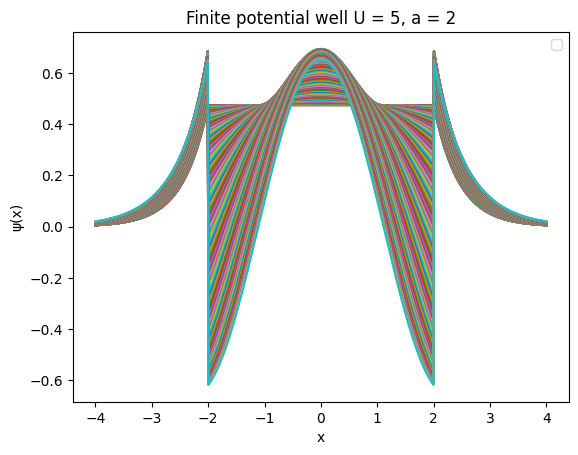

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.23606797749979, 2.236022347649924, 2.235885452513056, 2.23565727532395, 2.2353377881291356, 2.234926951769781, 2.2344247158576698, 2.233831018744267, 2.2331457874828122, 2.2323689377833955, 2.23150037396095, 2.2305399888760813, 2.229487663868656, 2.228343268684042, 2.227106661391906, 2.2257776882974367, 2.224356183844871, 2.2228419705131786, 2.2212348587037485, 2.21953464661991, 2.217741120138109, 2.2158540526705397, 2.2138732050190306, 2.211798325219949, 2.209629148379896, 2.2073653965019284, 2.2050067783020357, 2.202552989015585, 2.2000037101934193, 2.1973586094872837, 2.194617340424231, 2.1917795421696313, 2.1888448392783966, 2.185812841434, 2.18268314317485, 2.1794553236075442, 2.1761289461065134, 2.172703557999522, 2.1691786902384678, 2.1655538570548933, 2.1618285555995724, 2.158002265565516, 2.154074448793686, 2.1500445488606745, 2.145911990647552, 2.141676179889045, 2.137336502702156, 2.1328923250932736, 2.128342992442773, 2.123687828966037, 2.1189261371497734, 2.114057197162

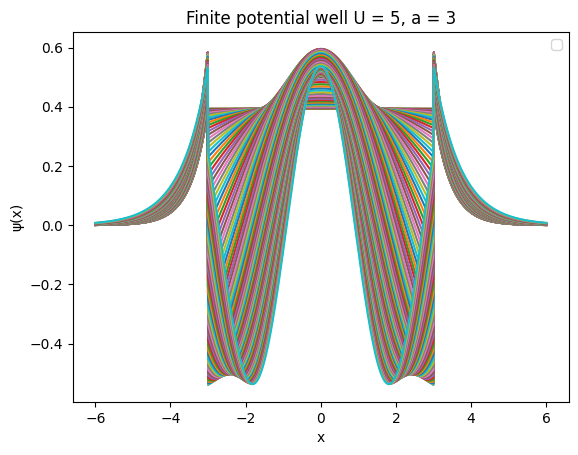

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.23606797749979, 2.235999532375805, 2.235794184431848, 2.2354518959403626, 2.234972603983567, 2.234356220395586, 2.2336026316812587, 2.232711698911455, 2.231683257594667, 2.2305171175245992, 2.2292130626034354, 2.22777085064038, 2.2261902131250544, 2.2244708549752277, 2.222612454258345, 2.2206146618862137, 2.2184771012821782, 2.216199368020027, 2.213781029433804, 2.211221624197641, 2.2085206618746294, 2.205677622433678, 2.2026919557332234, 2.1995630809705493, 2.1962903860954035, 2.192873227186463, 2.189310927789126, 2.185602778212965, 2.1817480347870637, 2.1777459190713304, 2.173595617021733, 2.1692962781072525, 2.16484701437619, 2.160246899469287, 2.1554949675769284, 2.1505902123375105, 2.1455315856738086, 2.140317996563985, 2.1349483097435904, 2.1294213443346504, 2.1237358723976483, 2.117890617401864, 2.111884252609203, 2.1057153993662703, 2.0993826252990204, 2.0928844424038795, 2.086219305028746, 2.079385607736739, 2.07238168304499, 2.06520579903014, 2.0578561567915017, 2.05033088

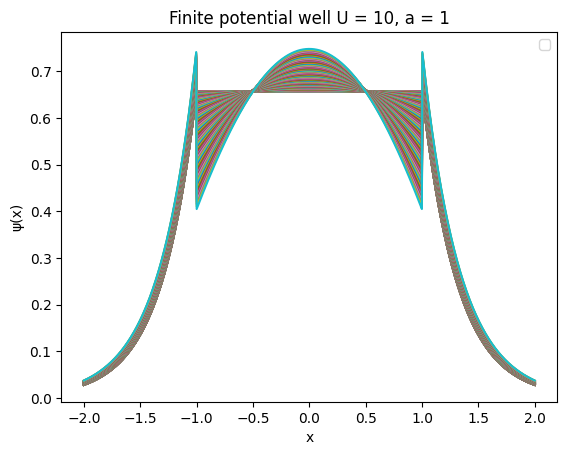

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.1622776601683795, 3.1622615277037003, 3.1622131298158505, 3.1621324650233196, 3.1620195308566688, 3.1618743238581577, 3.1616968395812104, 3.161487072589737, 3.1612450164573, 3.160970663766129, 3.1606640061059843, 3.160325034072865, 3.159953737267566, 3.1595501042940812, 3.1591141227578503, 3.158645779263851, 3.1581450594145384, 3.1576119478076237, 3.1570464280336976, 3.156448482673697, 3.1558180932962085, 3.1551552404546164, 3.154459903684087, 3.15373206149839, 3.1529716913865613, 3.152178769809393, 3.1513532721957658, 3.15049517293881, 3.1496044453918977, 3.1486810618644667, 3.14772499361767, 3.1467362108598587, 3.145714682741878, 3.1446603773522015, 3.1435732617118726, 3.1424533017692773, 3.1413004623947267, 3.140114707374858, 3.1388959994068517, 3.1376443000924534, 3.136359569931813, 3.1350417683171226, 3.133690853526064, 3.132306782715057, 3.1308895119123044, 3.1294389960106375, 3.1279551887601493, 3.1264380427606264, 3.124887509453761, 3.123303539115153, 3.1216860808460916, 3.1

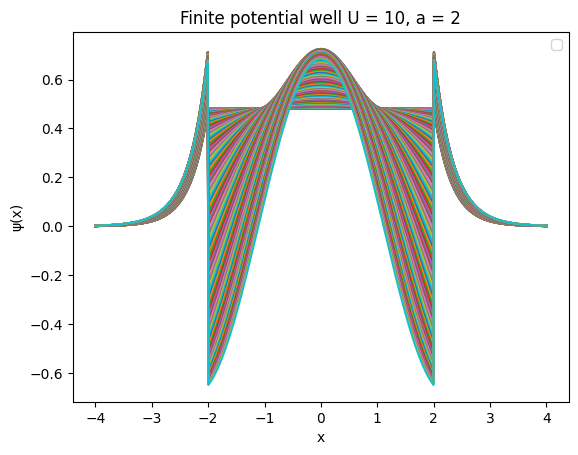

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.1622776601683795, 3.1622453951567198, 3.162148598146443, 3.16198726321105, 3.1617613804710274, 3.16147093609082, 3.1611159122745924, 3.160696287260776, 3.1602120353153884, 3.1596631267241397, 3.159049527783295, 3.15837120078931, 3.157628104027217, 3.156820191757757, 3.1559474142032538, 3.155009717532211, 3.1540070438426286, 3.152939331144022, 3.1518065133381303, 3.1506085201983076, 3.1493452773475683, 3.1480167062352855, 3.14662272411251, 3.1451632440059085, 3.1436381746902846, 3.142047420659675, 3.140390882096992, 3.138668454842194, 3.136880030358957, 3.135025495699818, 3.1331047334697772, 3.1311176217883157, 3.1290640342498057, 3.1269438398822866, 3.1247569031045668, 3.122503083681626, 3.120182236678275, 3.1177942124110407, 3.1153388563982367, 3.1128160093081836, 3.110225506905526, 3.107567179995615, 3.1048408543669064, 3.10204635073132, 3.099183484662523, 3.096252066532073, 3.0932519014433795, 3.0901827891634164, 3.0870445240521325, 3.0838368949895, 3.080559685300134, 3.077212672

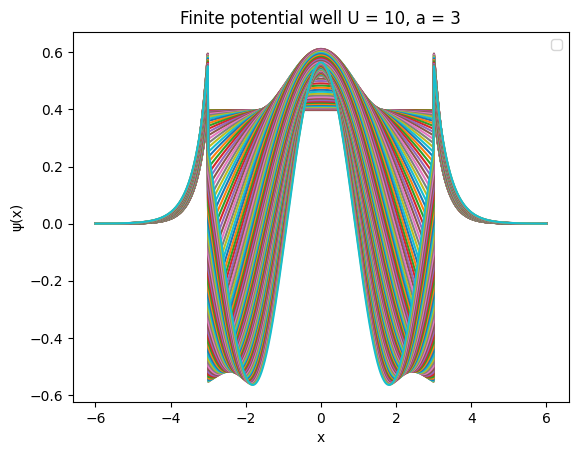

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.1622776601683795, 3.162229262527437, 3.162084065160076, 3.1618420547306534, 3.161503209006293, 3.161067496846666, 3.160534878189678, 3.15990530403303, 3.159178716411647, 3.1583550483709475, 3.157434223935914, 3.1564161580759538, 3.1553007566654836, 3.154087916440222, 3.1527775249491206, 3.151369460501898, 3.1498635921121054, 3.148259779435675, 3.1465578727048693, 3.144757712657567, 3.1428591304618076, 3.1408619476355026, 3.13876597596123, 3.136571017396012, 3.1342768639759786, 3.1318832977157967, 3.1293900905027616, 3.126797003985425, 3.1241037894566204, 3.12131018773076, 3.118415929015257, 3.1154207327759087, 3.112324307596094, 3.1091263510296048, 3.1058265494469364, 3.102424577874843, 3.0989200998289657, 3.0953127671393195, 3.0916022197684185, 3.0877880856218076, 3.083869980350761, 3.0798475071468796, 3.075720256528336, 3.071487806117461, 3.0671497204093914, 3.0627055505314575, 3.058154833992979, 3.053497094425126, 3.048731841310479, 3.0438585697019036, 3.038876759930335, 3.033785

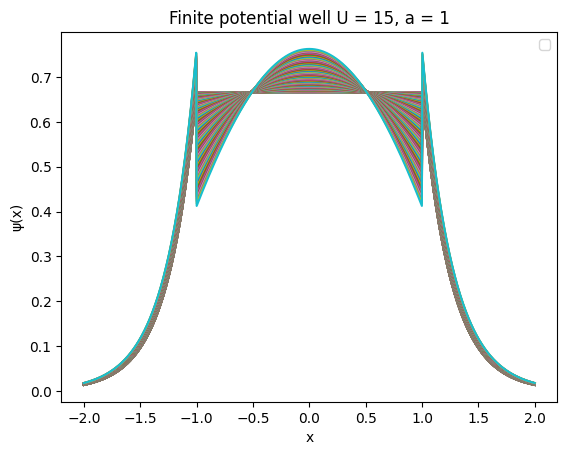

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.872983346207417, 3.872970174116364, 3.8729306575744107, 3.8728647957751448, 3.8727725873744547, 3.8726540304903927, 3.8725091227029815, 3.8723378610539685, 3.872140242046524, 3.871916261644883, 3.8716659152739314, 3.871389197818744, 3.871086103624054, 3.8707566264936806, 3.870400759689893, 3.8700184959327184, 3.869609827399199, 3.8691747457225882, 3.868713241991493, 3.86822530674896, 3.8677109299915005, 3.8671701011680657, 3.866602809178959, 3.8660090423746922, 3.8653887885547857, 3.864742034966507, 3.864068768303556, 3.863368974704687, 3.8626426397522726, 3.8618897484708112, 3.8611102853253705, 3.860304234219974, 3.859471578495926, 3.858612300930075, 3.857726383733017, 3.8568138085472357, 3.855874556445181, 3.8549086079272863, 3.85391594291992, 3.852896540773274, 3.85185038025919, 3.8507774395689176, 3.849677696310811, 3.848551127507955, 3.8473977095957297, 3.846217418419305, 3.845010229231067, 3.843776116687976, 3.842515054848859, 3.8412270171716276, 3.8399119765104293, 3.83856990

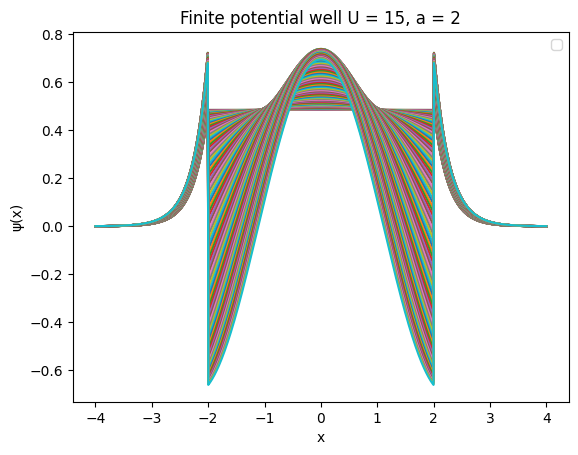

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3.872983346207417, 3.872957001980512, 3.8728779682246013, 3.87274624171387, 3.872561817071234, 3.872324686767235, 3.872034841118508, 3.871692268285801, 3.8712969542715565, 3.870848882917049, 3.8703480358990787, 3.869794392726222, 3.8691879307346286, 3.8685286250833766, 3.867816448749372, 3.867051372521793, 3.8662333649960807, 3.8653623925674694, 3.8644384194240513, 3.86346140753938, 3.8624313166646, 3.8613481043201032, 3.860211725786713, 3.859022134096379, 3.857779280022389, 3.856483112069093, 3.8551335764611223, 3.853730617132117, 3.8522741757129397, 3.850764191519378, 3.849200601539328, 3.8475833404194533, 3.8459123404513096, 3.844187531556932, 3.8424088412738753, 3.840576194739699, 3.838689514675893, 3.8367487213712317, 3.834753732664547, 3.8327044639269183, 3.8306008280432633, 3.8284427353933217, 3.826230093832024, 3.8239628086692345, 3.821640782648853, 3.8192639159272734, 3.8168321060511796, 3.814345247934669, 3.811803233835694, 3.809205953331807, 3.8065532932951904, 3.8038451378

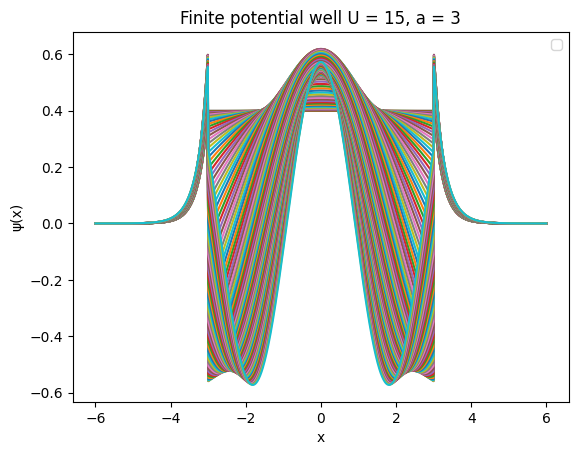

[3.872983346207417, 3.8729438297998615, 3.8728252781579586, 3.8726276840232603, 3.8723510352958814, 3.871995315030798, 3.8715605014326515, 3.8710465678490715, 3.870453482762497, 3.8697812097805024, 3.8690297076246116, 3.8681989301176025, 3.867288826169281, 3.8662993397607255, 3.8652304099269816, 3.8640819707382015, 3.8628539512792064, 3.8615462756274677, 3.860158862829481, 3.8586916268755207, 3.8571444766727563, 3.8555173160167087, 3.853810043561028, 3.8520225527855696, 3.8501547319627423, 3.848206464122107, 3.846177627013199, 3.8440680930665407, 3.8418777293528246, 3.8396063975402264, 3.8372539538498214, 3.834820249009069, 3.832305128203325, 3.8297084310253524, 3.8270299914227826, 3.8242696376434937, 3.821427192178855, 3.8185024717048006, 3.815495287020679, 3.8124054429858307, 3.809232738453848, 3.8059769662044527, 3.8026379128729486, 3.7992153588771793, 3.7957090783419387, 3.792118839020765, 3.7884444022150605, 3.7846855226904506, 3.7808419485903384, 3.7769134213465523, 3.77289967558

In [71]:
U_values = [5, 10, 15]
a_values = [1, 2, 3]

# U_values = [5]
# a_values = [3]

for U in U_values:
    for a in a_values:
        eigen_values = potential_well(U,a)
        plot_wavefunction(U, a, energies = eigen_values)


In [54]:
eigen_values = potential_well(5,3)
eigen_values - U

C:\Users\ratho\AppData\Local\Temp\ipykernel_36428\3974957855.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(k*a) + (np.sqrt(k**2 - U))/k
C:\Users\ratho\AppData\Local\Temp\ipykernel_36428\3974957855.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  roots = opt.fsolve(transcendental_equation, x0= np.linspace(0,np.sqrt(U),100))


array([-5.        , -4.99969391, -4.99877564, -4.99724518, -4.99510254,
       -4.99234772, -4.98898072, -4.98500153, -4.98041016, -4.97520661,
       -4.96939088, -4.96296296, -4.95592287, -4.94827058, -4.94000612,
       -4.93112948, -4.92164065, -4.91153964, -4.90082645, -4.88950107,
       -4.87756351, -4.86501377, -4.85185185, -4.83807775, -4.82369146,
       -4.80869299, -4.79308234, -4.7768595 , -4.76002449, -4.74257729,
       -4.72451791, -4.70584634, -4.6865626 , -4.66666667, -4.64615856,
       -4.62503826, -4.60330579, -4.58096113, -4.55800429, -4.53443526,
       -4.51025406, -4.48546067, -4.4600551 , -4.43403734, -4.40740741,
       -4.38016529, -4.35231099, -4.32384451, -4.29476584, -4.26507499,
       -4.23477196, -4.20385675, -4.17232935, -4.14018978, -4.10743802,
       -4.07407407, -4.04009795, -4.00550964, -3.97030915, -3.93449648,
       -3.89807163, -3.86103459, -3.82338537, -3.78512397, -3.74625038,
       -3.70676462, -3.66666667, -3.62595654, -3.58463422, -3.54